<a href="https://colab.research.google.com/github/Vinnicios1Santos/Data_Science/blob/main/Tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJETO DE ANÁLISE EXPLORATÓRIA E LIMPEZA DE DADOS**

Tempo - temos a base Tempo que se encontra em csv, nela contem alguns dados referente ao clima. utilizei para realizar uma análise exploratória e limpeza seguindo as regras de negócio abaixo:


Regras de negócio:

1. Aparência: sol, nublado, chuva
2. Temperatura: -130 ~ 130 F
3. Umidade: 0 ~ 100
4. Jogar: Sim / Não

In [1]:
#importando as libs necessárias

import pandas as pd
import statistics as sts
import seaborn as srn
import matplotlib.pyplot as plt


In [2]:
#lendo a base - está base está dentro do google drive3
df = pd.read_csv('/content/drive/MyDrive/Data Science /FormacaoCD/10.Prática em Python/dados/tempo.csv', sep=';')

In [3]:
#Verificando as primeiras linhas do DF
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
#verificando o tamanho do df.
df.shape

(14, 5)

In [5]:
#verificar os tipos de dados dentro das colunas do DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 688.0+ bytes


In [6]:
#Verificando se temos valores nulos dentro do dataset
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

#Análise Exploratória - Resumos estatísticos e Visuais.

*COLUNA APARENCIA*

In [7]:
#verificando a primeira coluna categórica ( Aparencia )
agrupado = df.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Text(0.5, 1.0, 'Aparência')

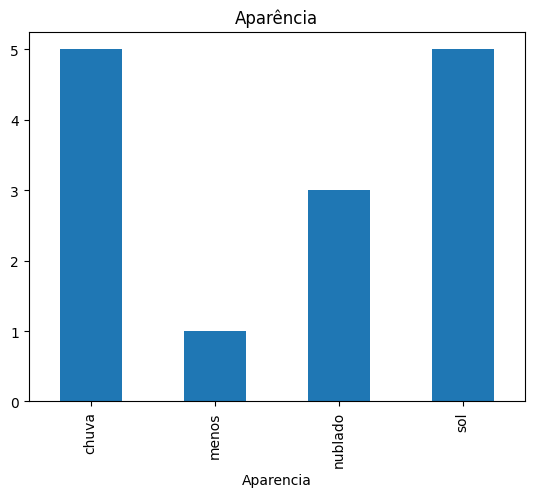

In [8]:
agrupado.plot.bar(df['Aparencia']).set_title('Aparência')

*Coluna Vento*

In [9]:
#Análise exploratória da coluna Vento

agrupado = df.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

Text(0.5, 1.0, 'Vento')

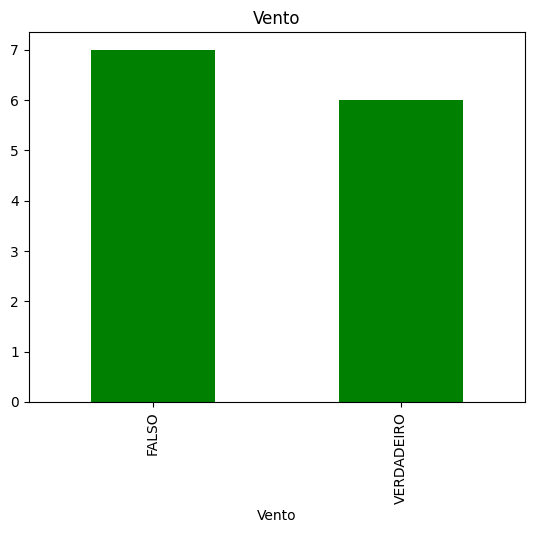

In [10]:
agrupado.plot.bar(['Aparencia'], color = 'Green').set_title('Vento')

In [11]:
#Explorando a coluna Temperatura

df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

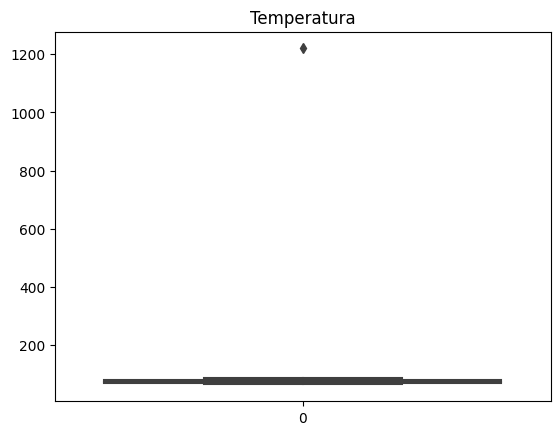

In [12]:
srn.boxplot(df['Temperatura']).set_title('Temperatura')

In [13]:
#Explorando coluna umidade

df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

<Axes: >

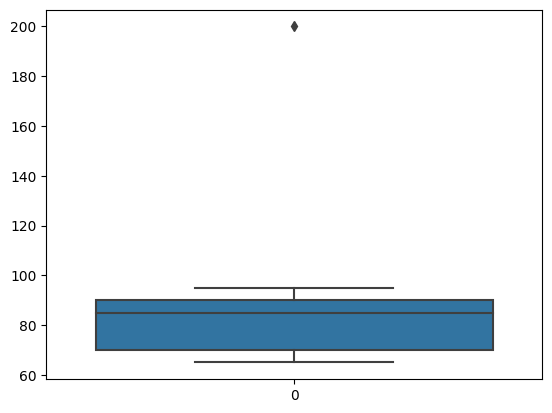

In [14]:
srn.boxplot(df['Umidade'], )

In [15]:
#Explorando coluna jogar
agrupado = df.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [16]:
agrupado = df.groupby(['Jogar']).size()

Text(0.5, 1.0, 'JOGAR?')

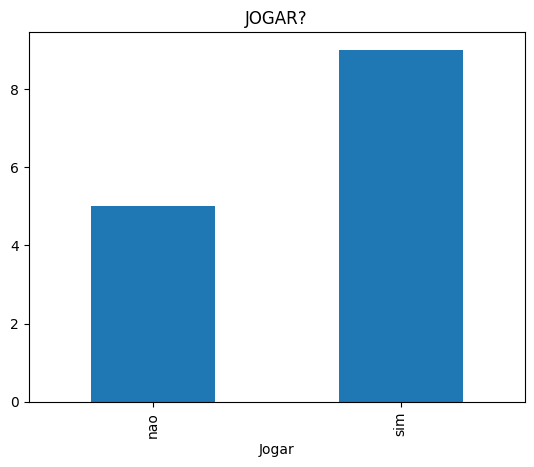

In [17]:
agrupado.plot.bar(['Jogar']).set_title('JOGAR?')

#Limpeza e Tratamento do DF


In [18]:
#realizando tratamento dos dados nulos

df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [19]:
#tratando a coluna de umidade
df['Umidade'].isnull().sum()

1

In [20]:

#calculando a mediana
mediana = sts.median(df['Umidade'])
mediana

#aplicando a mediana, substuindo dentro da própria df
df['Umidade'].fillna(mediana, inplace = True)


In [21]:
#verificando o resultado
df['Umidade'].isnull().sum()

0

In [22]:
#nulos

df.isnull().sum()


Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [23]:
#tratando o null da coluna Vento
#neste caso como é um objeto, vamos utilizar a moda para poder tratar esse dado
df['Vento'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14 entries, 0 to 13
Series name: Vento
Non-Null Count  Dtype 
--------------  ----- 
13 non-null     object
dtypes: object(1)
memory usage: 240.0+ bytes


In [24]:
#calculando a moda
moda = sts.mode(df['Vento'])
moda

'FALSO'

In [25]:
#substuindo o valor nulo pela moda

df['Vento'].fillna(moda, inplace = True)

In [26]:
#verificando o resultado

df['Vento'].isnull().sum()

0

In [27]:
#Coluna Aparencia - Regra de Negócio

#calculando o valor da moda
moda = sts.mode(df['Aparencia'])

#aplicando o valor da moda

df.loc[df['Aparencia'] == 'menos', 'Aparencia'] = moda

#verificando o resultado

df['Aparencia']

0         sol
1         sol
2     nublado
3       chuva
4       chuva
5       chuva
6         sol
7         sol
8         sol
9       chuva
10        sol
11    nublado
12    nublado
13      chuva
Name: Aparencia, dtype: object

In [28]:
#verificando novamente a coluna temperatura

df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [33]:
#localizando valores fora do dominio

df.loc[(df['Temperatura'] < -130 )|( df['Temperatura'] > 130), 'Temperatura']

7    1220
Name: Temperatura, dtype: int64

In [34]:
#utilizando a mediana para alterar o valor

mediana = sts.median(df['Temperatura'])
mediana

73.5

In [35]:
#aplicando a mediana
df.loc[(df['Temperatura'] < -130 ) | (df['Temperatura'] > 130), 'Temperatura'] = mediana


In [37]:
#visualizando novamente
df.loc[(df['Temperatura'] < -130 ) | (df['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [38]:
#verificando a coluna Umidade

df['Umidade'].describe()

count     14.000000
mean      89.464286
std       33.204763
min       65.000000
25%       71.250000
50%       85.250000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [45]:
#realizando a busca de outliers

df.loc[(df['Umidade'] <= 0) | (df['Umidade'] >= 100), 'Umidade']

9    200.0
Name: Umidade, dtype: float64

In [47]:
#calculando a mediana e aplicando

mediana = sts.median(df['Umidade'])
df.loc[(df['Umidade'] <= 0) | (df['Umidade'] >= 100), 'Umidade'] = mediana

In [50]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [51]:
df.shape

(14, 5)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     float64
 2   Umidade      14 non-null     float64
 3   Vento        14 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(2), object(3)
memory usage: 688.0+ bytes


In [56]:
#exportando o df tratado para um arquivo em csv dentro do diretório do google drive.

df.to_csv('/content/drive/MyDrive/Data Science /Projetos/Tempo/Tempo_Tratado.csv', index = False)